### 讀入資料

In [1]:
import pyreadstat
import pandas as pd

file_path = './tscs221.sav'

# Read .sav data
# df is data frame
# meta is variable descriptions
df, meta = pyreadstat.read_sav(file_path)

### 變項說明

In [2]:
print("--- 變項（欄位）名稱與標籤說明 ---")

# meta.column_names_to_labels is a dict data structure： {column name: column label}
# column label is description to that column
variable_labels = meta.column_names_to_labels

for col_name, label in variable_labels.items():
    print(f"[{col_name}]: {label}")

--- 變項（欄位）名稱與標籤說明 ---
[id]: id 樣本編號
[zip]: zip (抽樣地區)郵遞區號
[zipr]: zipr (抽樣地區)郵遞區號重新編碼
[stratum2]: stratum2 2005層別代碼
[region]: region 2005地理區代碼
[stratum2014]: stratum2014 2014層別代碼
[region2014]: region2014 2014地理區代碼
[r_stratum2014]: r_stratum2014 2014地理區與層別代碼
[psu]: psu 第一抽出單位
[ssu]: ssu 第二抽出單位
[wsel0]: wsel0 不等機率加權權值(抽樣)
[wsel]: wsel 不等機率加權權值
[wr4]: wr4 建立在初始權值等於不等機率加權權值，且以教育程度4分類進行加權之多變項反覆加權權值
[wr14]: wr14 建立在初始權值等於1，且以教育程度4分類進行加權之多變項反覆加權權值
[wave]: wave 波次
[qtype]: qtype 問卷別
[year]: year 調查年(西元年)
[year_m]: year_m 調查年(民國年)
[sdt1]: sdt1 訪問開始時間：__月__日
[sdt2]: sdt2 訪問開始時間：__時__分(24小時制)
[a1]: a1 性別
[a2y]: a2 您是什麼時候出生的?民國年
[a2m]: a2 您是什麼時候出生的?月
[a2r]: a2r 您是什麼時候出生的?忘記出生年/月，回答歲數(實歲)
[ka3]: a3 您在什麼地方出生的?
[a3city]: a3 您在什麼地方出生的?縣市
[a3zip]: a3zip 您在什麼地方出生的?郵遞區號
[a4a]: a4a 您自己的戶籍是不是設在這個地址(樣本名單上的門牌地址)?
[ka4a]: a4a 戶籍所在地為____縣/市____鄉/鎮/市/區
[a4acity]: a4a 戶籍所在地為____縣/市____鄉/鎮/市/區：縣市
[a4azip]: a4a 戶籍所在地為____縣/市____鄉/鎮/市/區：郵遞區號
[a4azipr]: a4a 戶籍所在地為____縣/市____鄉/鎮/市/區：郵遞區號重新編碼
[a4b]: a4b 您的戶籍所在地跟現住地址不同

### 視覺化範例（Matplotlib and Seaborn）

In [12]:
# Preview some datas in a variable
print(df['f12'].head(10))

# Look up label definitions for variable values
print(meta.variable_value_labels.get('f12'))
print(meta.variable_value_labels.get('d16a'))
print(meta.variable_value_labels.get('d16b'))

0    17.0
1    16.0
2    14.0
3     8.0
4    33.0
5    33.0
6    33.0
7    33.0
8    14.0
9    23.0
Name: f12, dtype: float64
{1.0: '有工作，但無收入', 2.0: '5千元以下', 3.0: '5千~1萬元以下', 4.0: '1萬~1萬5千元以下', 5.0: '1萬5千~2萬元以下', 6.0: '2萬~2萬5千元以下', 7.0: '2萬5千~3萬元以下', 8.0: '3萬~3萬5千元以下', 9.0: '3萬5千~4萬元以下', 10.0: '4萬~4萬5千元以下', 11.0: '4萬5千~5萬元以下', 12.0: '5萬~5萬5千元以下', 13.0: '5萬5千~6萬元以下', 14.0: '6萬~7萬元以下', 15.0: '7萬~8萬元以下', 16.0: '8萬~9萬元以下', 17.0: '9萬~10萬元以下', 18.0: '10萬~11萬元以下', 19.0: '11萬~12萬元以下', 20.0: '12萬~13萬元以下', 21.0: '13萬~14萬元以下', 22.0: '14萬~15萬元以下', 23.0: '15萬~16萬元以下', 24.0: '16萬~17萬元以下', 25.0: '17萬~18萬元以下', 26.0: '18萬~19萬元以下', 27.0: '19萬~20萬元以下', 28.0: '20萬~30萬元以下', 29.0: '30萬~40萬元以下', 30.0: '40萬~50萬元以下', 31.0: '50萬~100萬元以下', 32.0: '100萬元以上', 33.0: '目前沒有工作', 97.0: '不知道', 98.0: '拒答'}
{1.0: '從不', 2.0: '很少', 3.0: '有時', 4.0: '時常', 5.0: '很時常', 97.0: '不知道', 98.0: '拒答'}
{1.0: '從不', 2.0: '很少', 3.0: '有時', 4.0: '時常', 5.0: '很時常', 97.0: '不知道', 98.0: '拒答'}


#### 範例：寂寞和收入的關聯性

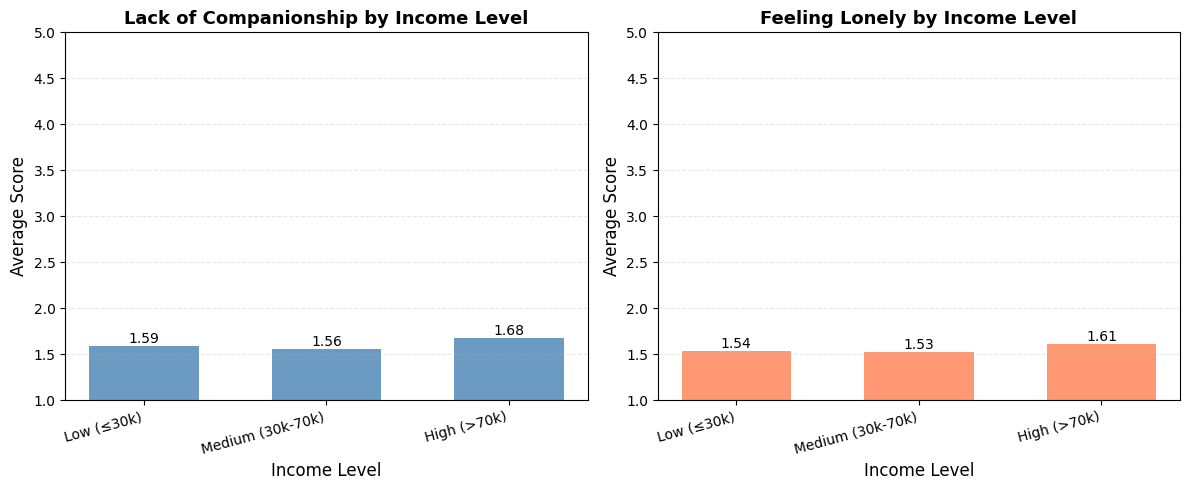

Sample sizes by income group:
income_group
Low (≤30k)          363
Medium (30k-70k)    593
High (>70k)         146
Name: count, dtype: int64

Total valid cases: 1102


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. 清理資料 - 剔除遺漏值和拒答
df_clean = df.copy()

# 移除特殊值
df_clean = df_clean[~df_clean['f12'].isin([33.0, 97.0, 98.0])]
df_clean = df_clean[~df_clean['d16a'].isin([97.0, 98.0])]
df_clean = df_clean[~df_clean['d16b'].isin([97.0, 98.0])]

# 2. 將 f12 分成 3 個收入分級
def income_category(value):
    if value <= 7:  # 3萬元以下
        return 'Low (≤30k)'
    elif value <= 14:  # 3萬~7萬元
        return 'Medium (30k-70k)'
    else:  # 7萬元以上
        return 'High (>70k)'

df_clean['income_group'] = df_clean['f12'].apply(income_category)

# 3. 計算每個收入群組的平均寂寞程度
income_order = ['Low (≤30k)', 'Medium (30k-70k)', 'High (>70k)']
loneliness_a = df_clean.groupby('income_group')['d16a'].mean()
loneliness_b = df_clean.groupby('income_group')['d16b'].mean()

# 重新排序
loneliness_a = loneliness_a.reindex(income_order)
loneliness_b = loneliness_b.reindex(income_order)

# 4. 視覺化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 圖1: 感覺缺少人作伴和收入的關聯性
x = np.arange(len(income_order))
width = 0.6
bars1 = ax1.bar(x, loneliness_a.values, width, color='steelblue', alpha=0.8)
ax1.set_xlabel('Income Level', fontsize=12)
ax1.set_ylabel('Average Score', fontsize=12)
ax1.set_title('Lack of Companionship by Income Level', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(income_order, rotation=15, ha='right')
ax1.set_ylim(1, 5)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# 在柱子上標註數值
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

# 圖2: 是否感到孤單和收入的關聯性
bars2 = ax2.bar(x, loneliness_b.values, width, color='coral', alpha=0.8)
ax2.set_xlabel('Income Level', fontsize=12)
ax2.set_ylabel('Average Score', fontsize=12)
ax2.set_title('Feeling Lonely by Income Level', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(income_order, rotation=15, ha='right')
ax2.set_ylim(1, 5)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# 在柱子上標註數值
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 顯示樣本數
print("Sample sizes by income group:")
print(df_clean['income_group'].value_counts().reindex(income_order))
print(f"\nTotal valid cases: {len(df_clean)}")